In [6]:
!pip install lazypredict

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UROP/pIC50_dataset.csv')
df

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,6.096910
...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,9.679854
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,6.562249
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,4.118045
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,4.259637


In [4]:
descriptors = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UROP/CDKextended.csv')
descriptors

,Name,ExtFP1,ExtFP2,ExtFP3,ExtFP4,ExtFP5,ExtFP6,ExtFP7,ExtFP8,ExtFP9,...,ExtFP1015,ExtFP1016,ExtFP1017,ExtFP1018,ExtFP1019,ExtFP1020,ExtFP1021,ExtFP1022,ExtFP1023,ExtFP1024
0,CHEMBL133897,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL131588,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130628,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,CHEMBL5219841,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6152,CHEMBL5219046,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6153,CHEMBL5219594,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6154,CHEMBL5219958,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [8]:
X = descriptors.drop('Name', axis=1)
Y = df['pIC50']

In [9]:
#remove low variance features
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,ExtFP1,ExtFP2,ExtFP3,ExtFP4,ExtFP5,ExtFP6,ExtFP7,ExtFP9,ExtFP10,ExtFP11,...,ExtFP994,ExtFP995,ExtFP997,ExtFP998,ExtFP999,ExtFP1012,ExtFP1013,ExtFP1015,ExtFP1016,ExtFP1017
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,1,0,0,1,0,0,1,0,1,1,...,1,0,0,1,0,1,0,1,0,0
6152,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6153,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
6154,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [10]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Defines and builds the lazyregressor
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = reg.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [08:01<00:05,  5.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2793
[LightGBM] [Info] Number of data points in the train set: 4924, number of used features: 931
[LightGBM] [Info] Start training from score 5.821106


100%|██████████| 42/42 [08:03<00:00, 11.51s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [06:49<00:03,  3.68s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2793
[LightGBM] [Info] Number of data points in the train set: 4924, number of used features: 931
[LightGBM] [Info] Start training from score 5.821106


100%|██████████| 42/42 [06:50<00:00,  9.77s/it]


In [12]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.99,0.99,0.15,0.78
ExtraTreeRegressor,0.99,0.99,0.15,0.80
ExtraTreesRegressor,0.99,0.99,0.15,62.36
GaussianProcessRegressor,0.99,0.99,0.15,104.77
MLPRegressor,0.97,0.97,0.26,14.58
XGBRegressor,0.96,0.97,0.27,4.83
RandomForestRegressor,0.94,0.95,0.34,41.13
BaggingRegressor,0.92,0.93,0.40,4.00
HistGradientBoostingRegressor,0.84,0.87,0.57,4.88


In [13]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,-0.02,0.75,0.79,42.55
LGBMRegressor,-0.08,0.74,0.81,1.25
HistGradientBoostingRegressor,-0.09,0.73,0.82,5.21
XGBRegressor,-0.12,0.73,0.83,1.45
SVR,-0.14,0.72,0.83,12.23
NuSVR,-0.15,0.72,0.84,9.30
BaggingRegressor,-0.18,0.71,0.85,5.04
KNeighborsRegressor,-0.25,0.70,0.87,0.42
MLPRegressor,-0.49,0.64,0.95,14.60


## **5. Data visualization of model performance**

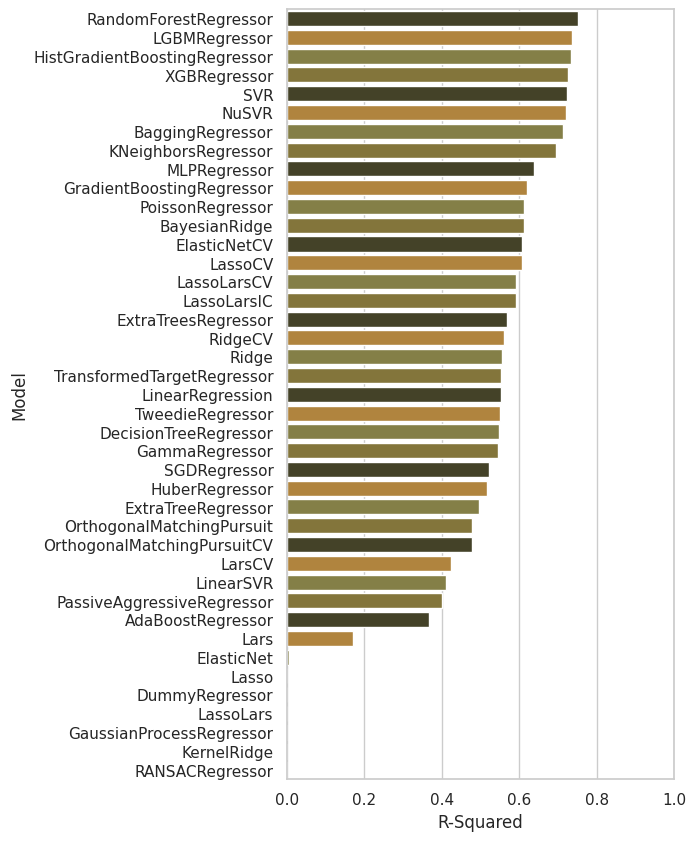

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom colors
custom_colors = ["#494623", "#c3892b", "#8e883d", "#8f7c2f"]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

# Using the custom color palette in the barplot
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test, palette=custom_colors)
ax.set(xlim=(0, 1))

plt.show()
